# Calculating emissions

In [66]:
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 28.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 16.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.1 MB/s eta 0:00:00:00:01


In [67]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Getting a list of all CSV files in the emissions folder

emission_files = glob.glob("emissions/emissions_base*.csv")

In [59]:
# Creating an empty data frame to store only those columns that I need

emissions_data = pd.DataFrame()

In [60]:
# Loop through the list of emissions data, load it, extract necessary columns and combine it into 1 data frame

for data in emission_files:
    df = pd.read_csv(data, usecols=[0, 4, 5])
    emissions_data = pd.concat([emissions_data, df], ignore_index = True)

In [61]:
emissions_data = emissions_data.sort_values(by = "emissions")
emissions_data["duration_min"] = emissions_data["duration"] / 60

In [62]:
emissions_data

,task_name,duration,emissions,duration_min
15,original_CRT_using_GPT-2_no_reasoningsmall,207.789521,0.004182,3.463159
10,original_CRT_using_GPT-2_small,496.467801,0.009991,8.274463
7,original_CRT_using_GPT-2_no_reasoningmedium,552.317579,0.011115,9.205293
1,original_CRT_using_GPT-2_medium,606.009976,0.012196,10.100166
9,original_CRT_using_GPT-2_no_reasoningxlarge,671.636256,0.013516,11.193938
11,alternative_CRT_using_GPT-2_no_reasoningsmall,683.641584,0.013758,11.394026
6,alternative_CRT_using_GPT-2_small,707.075508,0.014230,11.784592
14,original_CRT_using_GPT-2_no_reasoninglarge,734.284210,0.014777,12.238070
2,original_CRT_using_GPT-2_large,1238.764460,0.024930,20.646074
3,original_CRT_using_GPT-2_xlarge,1498.987422,0.030167,24.983124


In [63]:
total_emissions = emissions_data["emissions"].sum()
total_emissions

np.float64(0.4949714814560434)

In [64]:
emissions_data["task_name"] = emissions_data["task_name"].str.replace(
    r"original", "Original CRT", regex=True
).str.replace(
    r"alternative", "Alternative CRT", regex=True
).str.replace(
    r"small", "GPT-2 S", regex=False
).str.replace(
    r"medium", "GPT-2 M", regex=False
).str.replace(
    r"xlarge", "GPT-2 XL", regex=False
).str.replace(
    r"large", "GPT-2 L", regex=False
).str.replace(
    r"_CRT_using_GPT-2_no_reasoning", " NR ", regex=False
).str.replace(
    r"_CRT_using_GPT-2_", " R ", regex=False
)

In [65]:
emissions_data

,task_name,duration,emissions,duration_min
15,Original CRT NR GPT-2 S,207.789521,0.004182,3.463159
10,Original CRT R GPT-2 S,496.467801,0.009991,8.274463
7,Original CRT NR GPT-2 M,552.317579,0.011115,9.205293
1,Original CRT R GPT-2 M,606.009976,0.012196,10.100166
9,Original CRT NR GPT-2 XL,671.636256,0.013516,11.193938
11,Alternative CRT NR GPT-2 S,683.641584,0.013758,11.394026
6,Alternative CRT R GPT-2 S,707.075508,0.014230,11.784592
14,Original CRT NR GPT-2 L,734.284210,0.014777,12.238070
2,Original CRT R GPT-2 L,1238.764460,0.024930,20.646074
3,Original CRT R GPT-2 XL,1498.987422,0.030167,24.983124


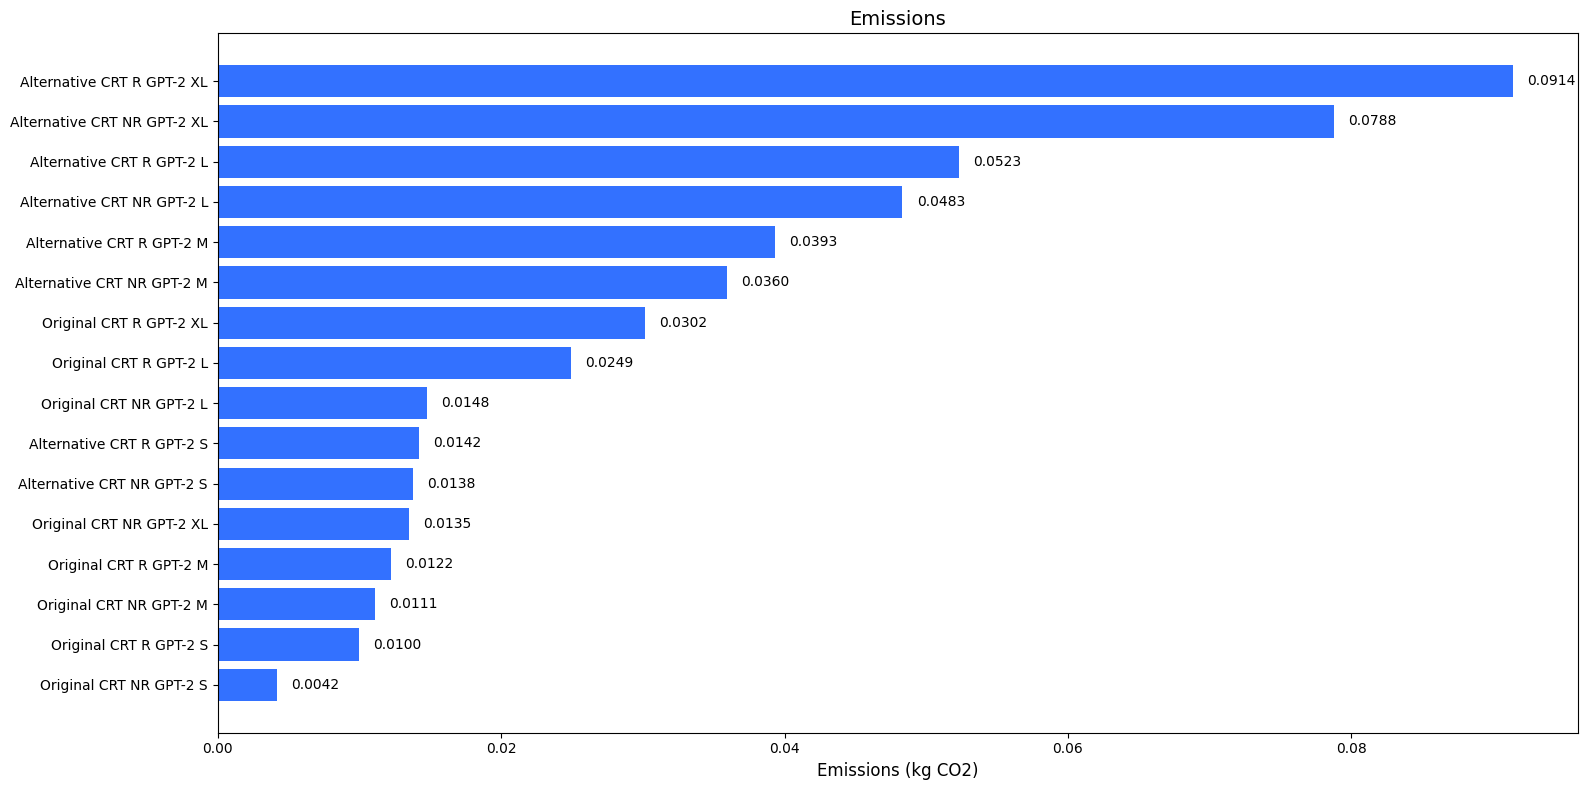

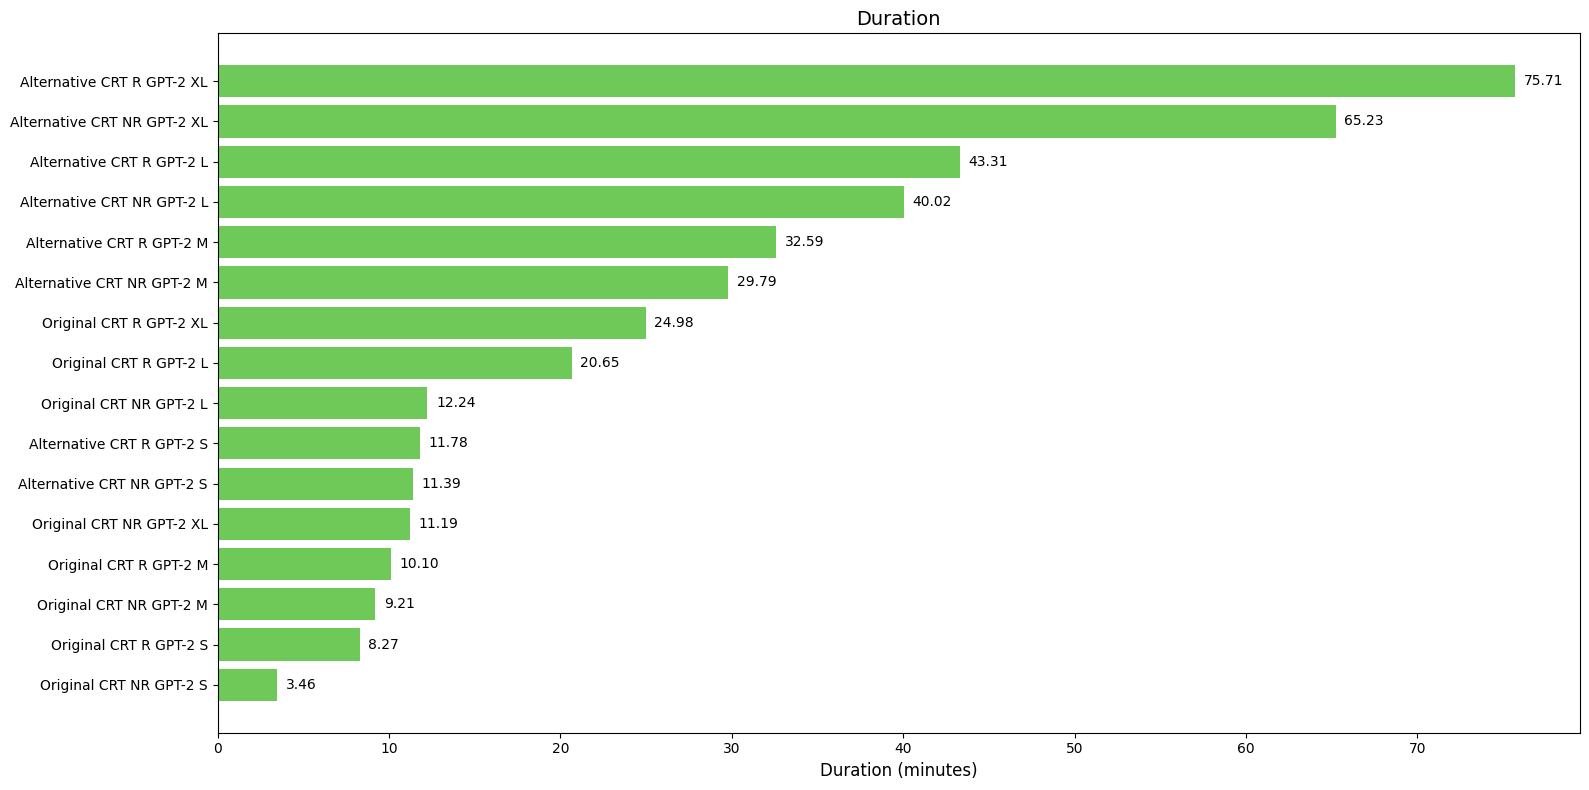

In [ ]:
# Plot 1: Emissions by Task

plt.figure(figsize = (16, 8))
bars = plt.barh(emissions_data['task_name'], emissions_data['emissions'], color = '#3371ff')
for bar, emission in zip(bars, emissions_data['emissions']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2, 
             f'{emission:.4f}', ha='left', va='center', fontsize=10)
plt.xlabel('Emissions (kg CO2)', fontsize=12)
plt.title('Emissions', fontsize=14)
plt.tight_layout()

plt.savefig('output/emissions_plot.png', dpi = 300)
plt.show()

# Plot 2: Duration by Task

plt.figure(figsize=(16, 8))
bars = plt.barh(emissions_data['task_name'], emissions_data['duration_min'], color = '#6fc959')
for bar, duration in zip(bars, emissions_data['duration_min']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
             f'{duration:.2f}', ha='left', va='center', fontsize=10)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.title('Duration', fontsize=14)
plt.tight_layout()

plt.savefig('output/duration_plot.png', dpi = 300)
plt.show()